#     Brain Stroke Detection Using Basic Machine Models

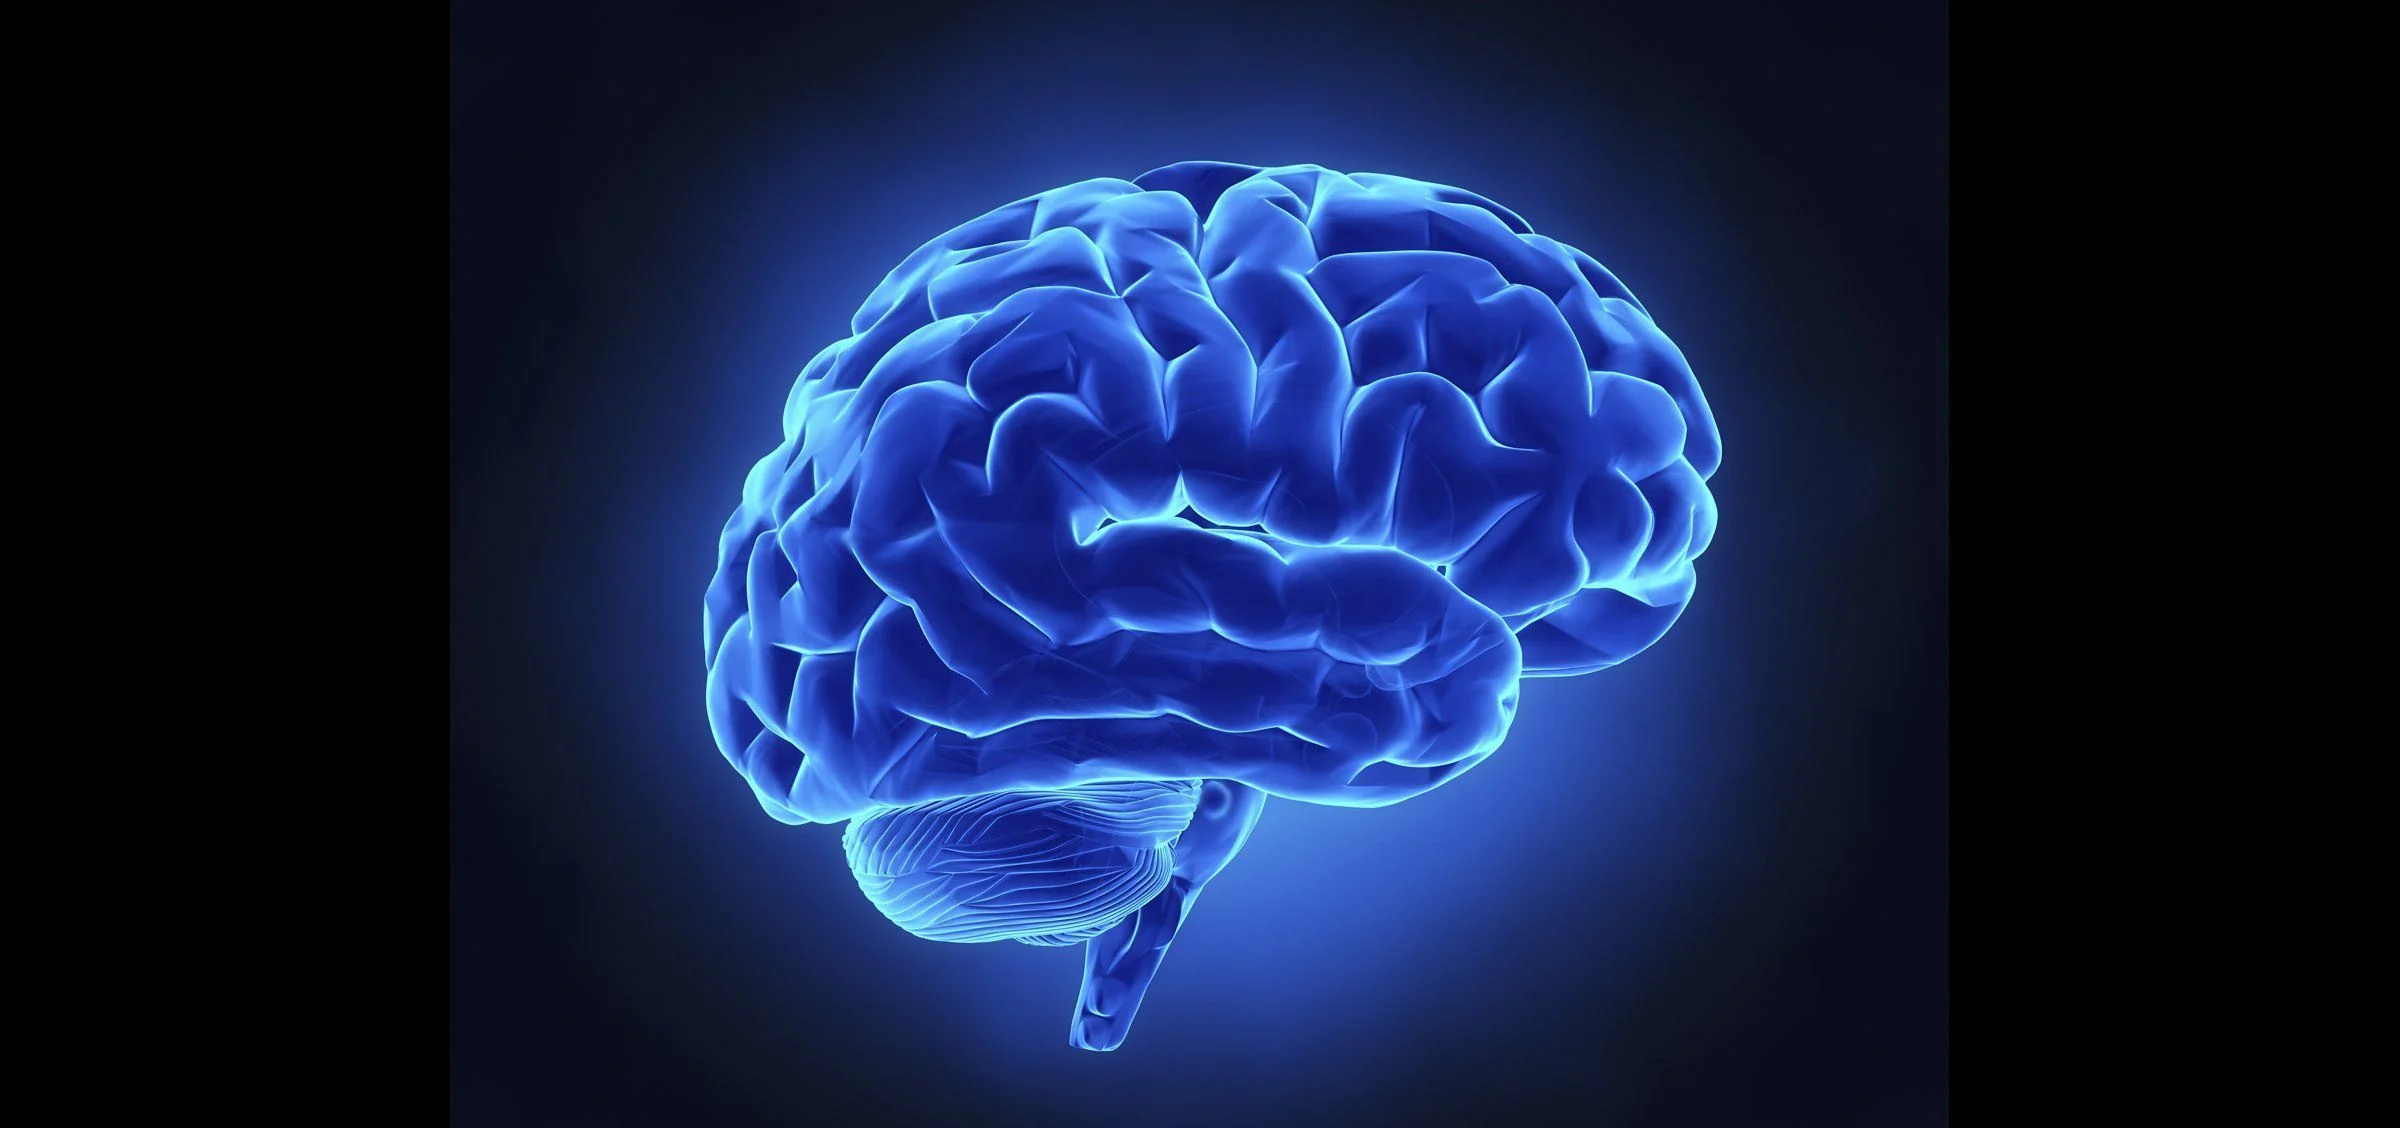


### by Lawrence Menegus 


The primary objective of this Jupyter Notebook is to conduct a comprehensive analysis of two datasets related to brain strokes. The focus will be on leveraging various machine learning techniques to identify and predict factors contributing to the occurrence of a brain stroke. This phase will involve extensive data exploration, cleaning, and preprocessing, followed by the application of predictive modeling to ascertain the key determinants of stroke.

In [1]:
# Import the for plotting, numpy and Pandas 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# import OS and Image for Image Prediction 
import os 
from PIL import Image 

# Import warnings for Tensorflow 
import warnings
warnings.filterwarnings('ignore')

# Import Tensorflow Module 
import tensorflow as tf

 #logistic regression
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier 

#Decision Tree
from sklearn.tree import DecisionTreeClassifier 

#training and testing data split
from sklearn.model_selection import train_test_split

#accuracy measure
from sklearn import metrics 

#for confusion matrix and Classification Matrix
from sklearn.metrics import confusion_matrix, classification_report 

# PR Curve
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix



# Introduction 

## 1.1 Read in the data 

The dataset that are being used in this project are from Kaggle (The online community platform for Data Scientists). 

In [2]:
# Dataset 
Stroke_factors = pd.read_csv("brainStroke.csv")

display(Stroke_factors)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


## 1.2 Checking / Cleaning the Datasets 

Stroke_factors.shape
Stroke_factors.info()

In [4]:
# The non unique features of this mod
Stroke_factors.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [5]:
# List the Columns in dataset 1 
Stroke_factors.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
Stroke_factors_col = Stroke_factors[['gender', 'hypertension', 
'heart_disease', 'ever_married','work_type', 'Residence_type', 
'smoking_status', 'stroke']]
                 
for i in Stroke_factors_col: 
    print(Stroke_factors_col[i].value_counts())

gender
Female    2907
Male      2074
Name: count, dtype: int64
hypertension
0    4502
1     479
Name: count, dtype: int64
heart_disease
0    4706
1     275
Name: count, dtype: int64
ever_married
Yes    3280
No     1701
Name: count, dtype: int64
work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64
Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64
stroke
0    4733
1     248
Name: count, dtype: int64


### 1.4 Visualization of the current Data 


#### for Context when a graph has a
###### 0 means that the person does not have the condition or done it 
###### 1 means taht the person has the condition or has not done it 


The data below explains the gender, Hyptertension, Heart Disease status and other factors that the people in the dataset may have. 

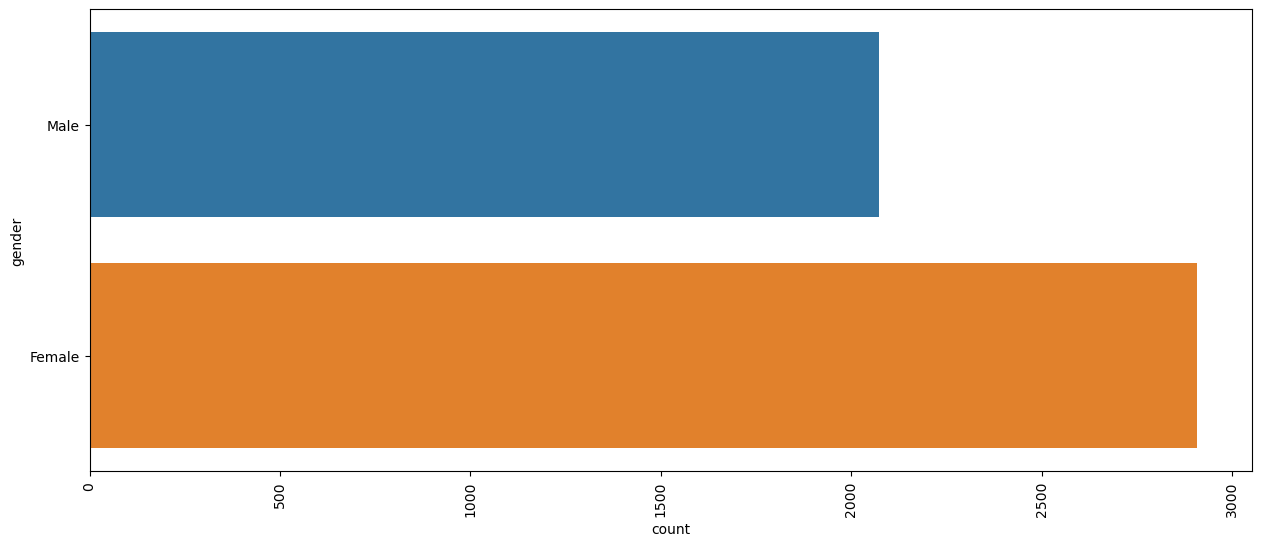

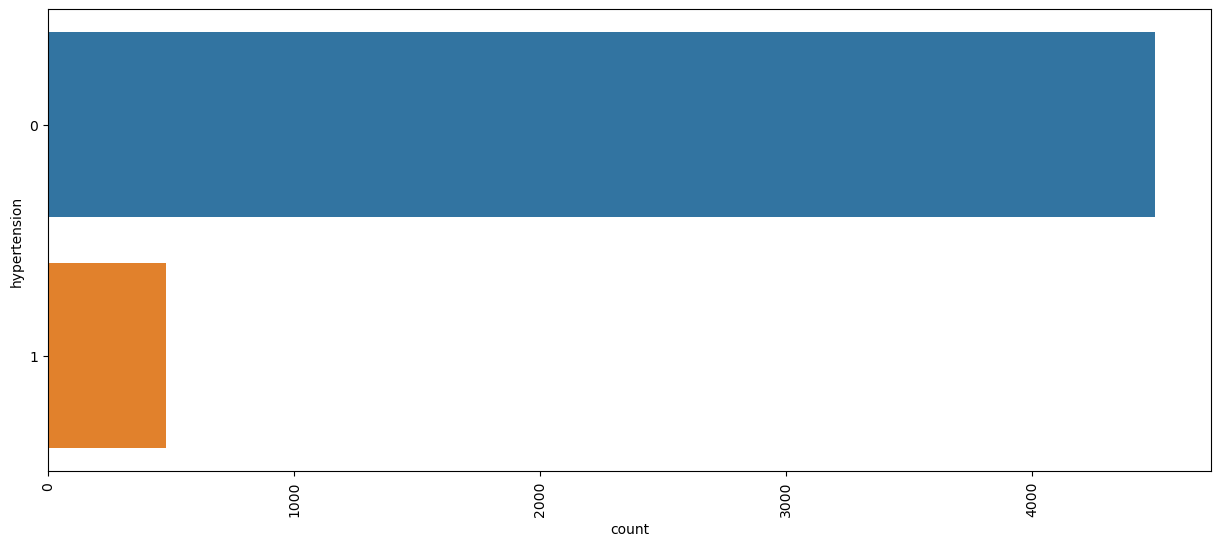

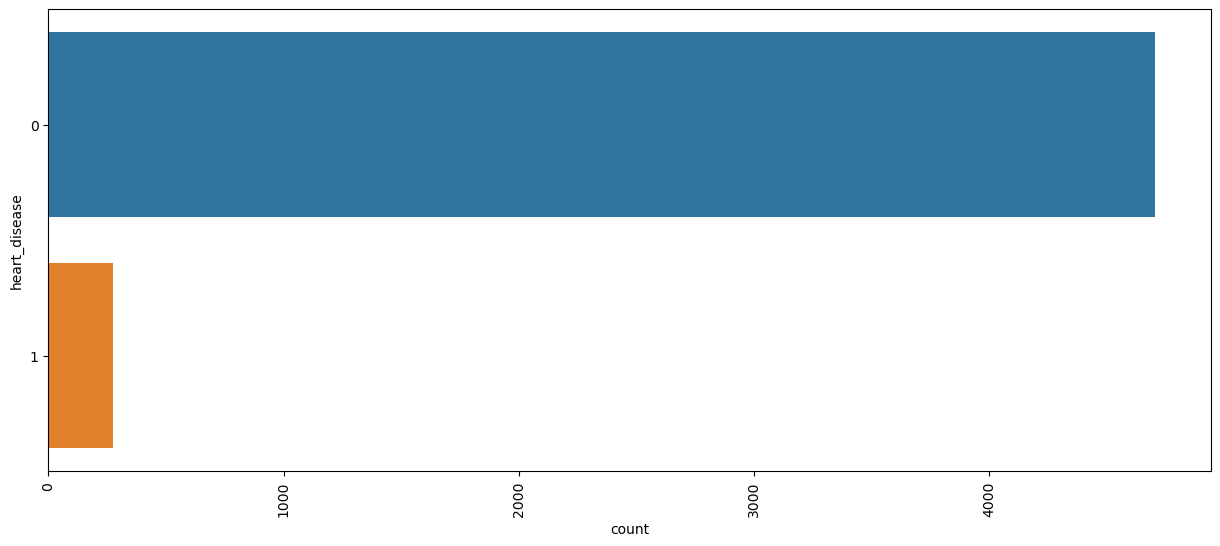

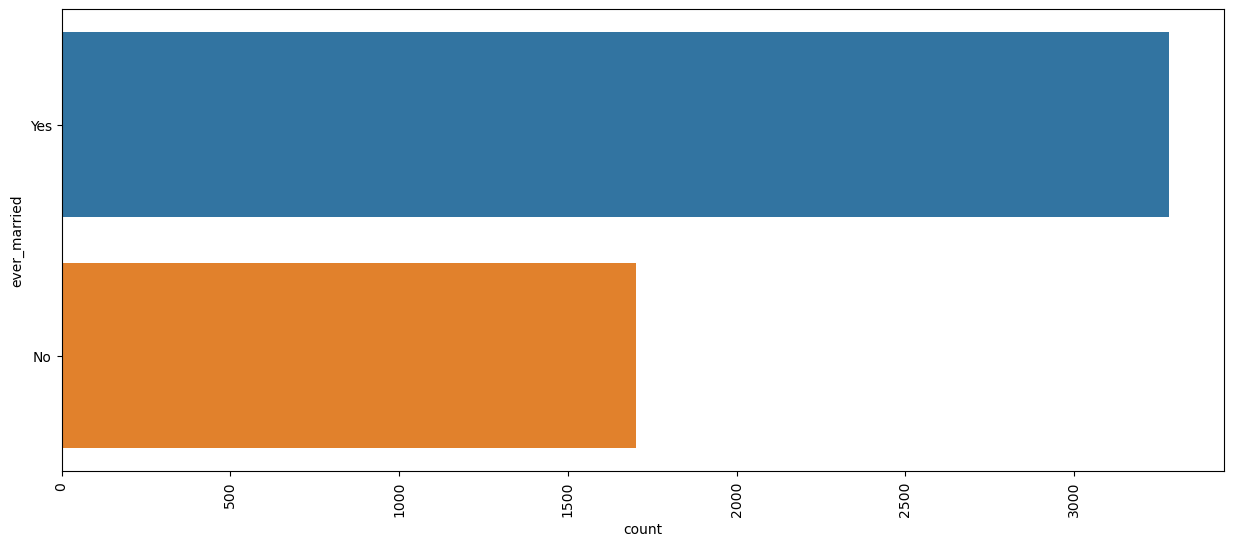

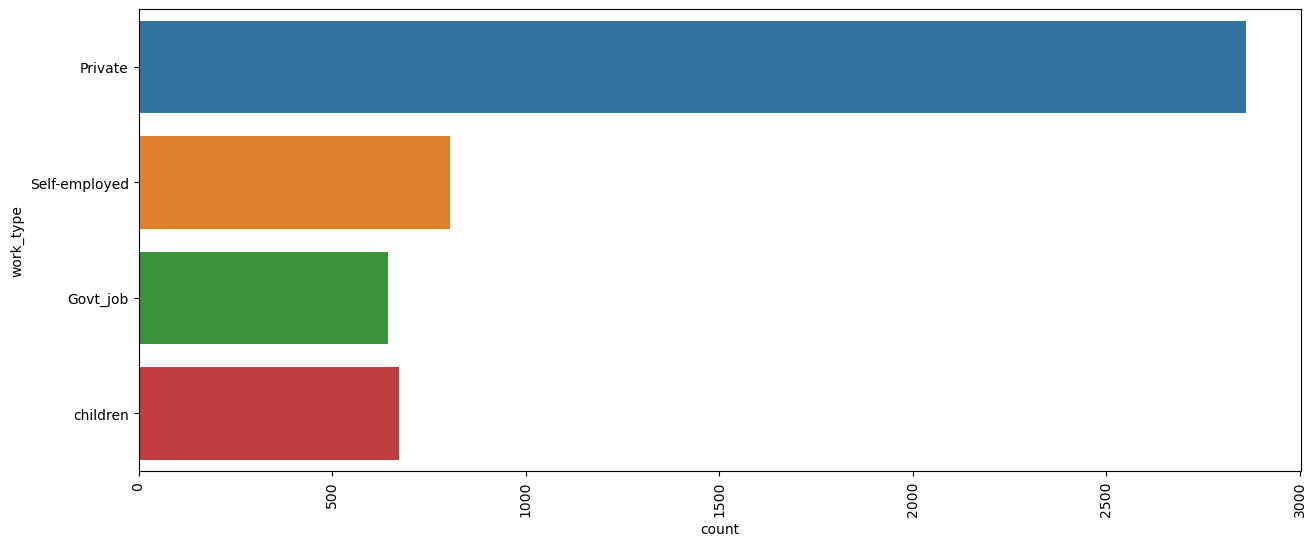

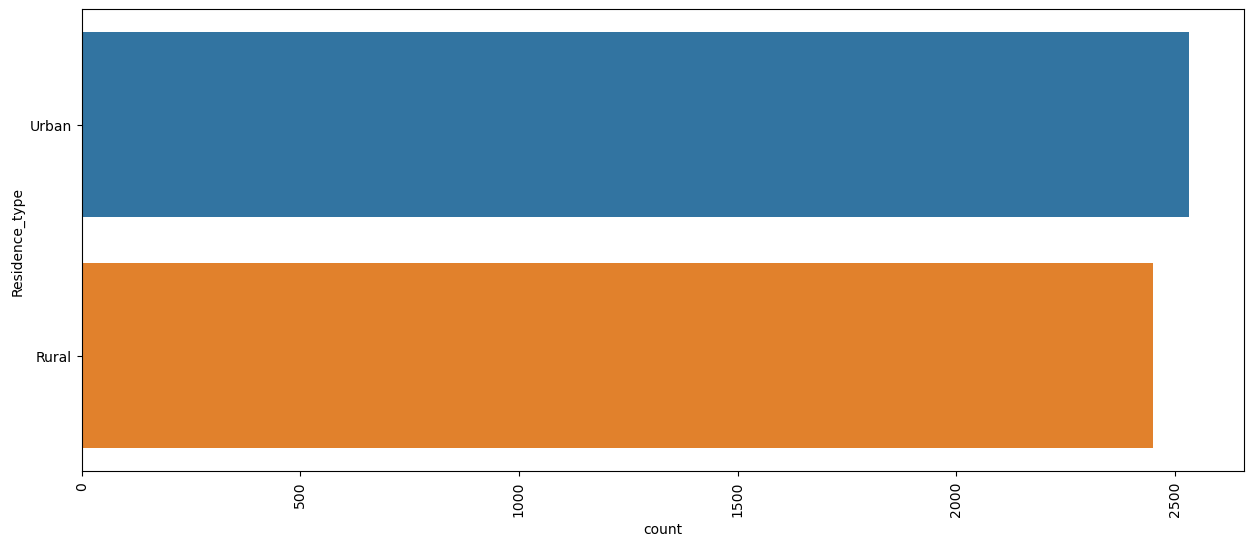

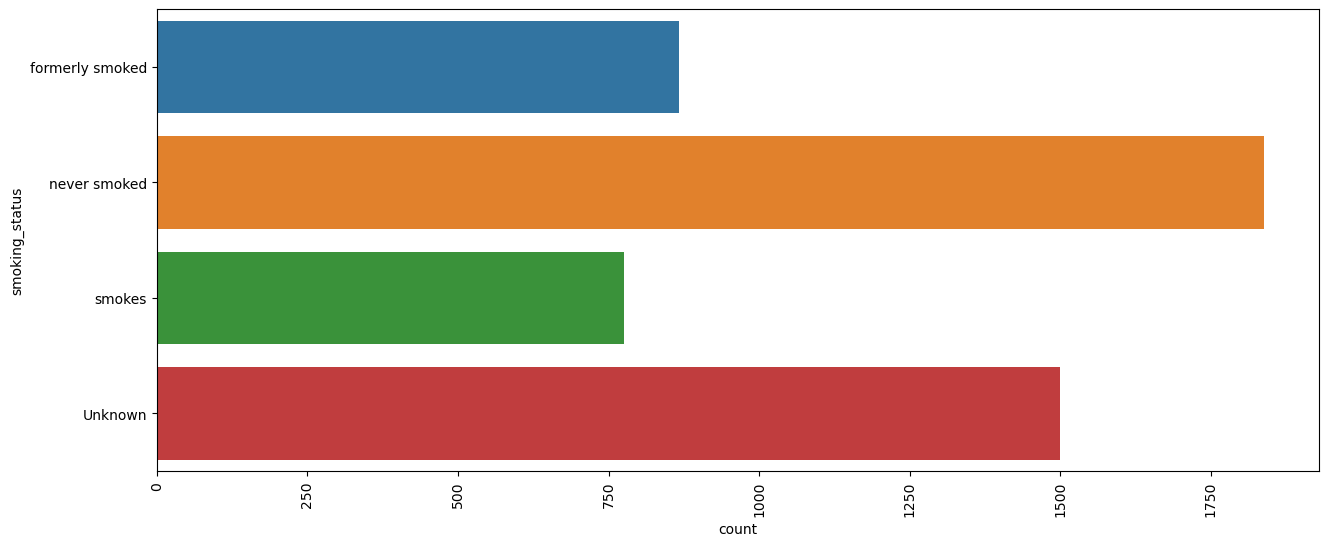

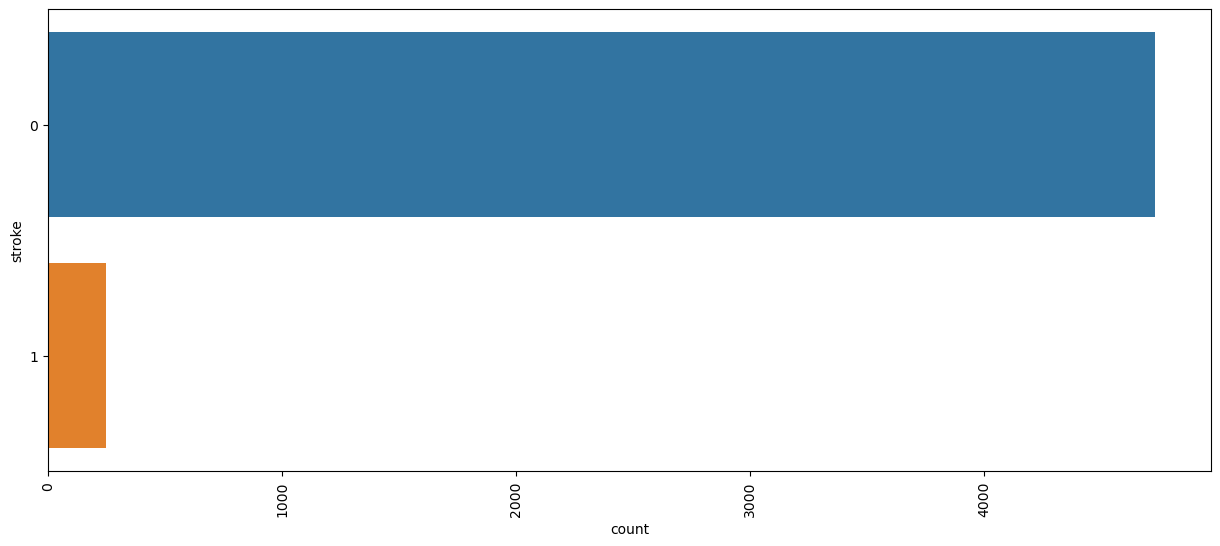

['gender_survey_of_participants.png',
 'hypertension_survey_of_participants.png',
 'heart_disease_survey_of_participants.png',
 'ever_married_survey_of_participants.png',
 'work_type_survey_of_participants.png',
 'Residence_type_survey_of_participants.png',
 'smoking_status_survey_of_participants.png',
 'stroke_survey_of_participants.png']

In [11]:
for i in Stroke_factors_col: 
    plt.figure(figsize = (15,6))
    sns.countplot(y =i, data = Stroke_factors_col)
    plt.xticks(rotation = 90)
    
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'{i}_survey_of_participants.png'))
    plt.show()
    
    
# List of saved files to confirm
saved_files = [f'{column}_survey_of_participants.png' for column in Stroke_factors_col]
saved_files


People who had a stroke based on different factors 

#### for Context when a graph has a
###### 0 means that the person does not have the condition or done it 
###### 1 means that the person has the condition or has not done it 

In [12]:
for i in Stroke_factors_col:
    plt.figure(figsize = (15,6))
    sns.countplot(x = i, data = Stroke_factors_col, hue = 'stroke')
    plt.xticks(rotation = 90)
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'{i}_of_stroke_victims.png'))
    plt.clf()
    
    plt.show()
    

# List of saved files to confirm
saved_files = [f'{column}_of_stroke_victims.png' for column in Stroke_factors_col]
saved_files


<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

['gender_of_stroke_victims.png',
 'hypertension_of_stroke_victims.png',
 'heart_disease_of_stroke_victims.png',
 'ever_married_of_stroke_victims.png',
 'work_type_of_stroke_victims.png',
 'Residence_type_of_stroke_victims.png',
 'smoking_status_of_stroke_victims.png',
 'stroke_of_stroke_victims.png']

#### The percentage of the proportion of people who had a stroke amoung Gender 

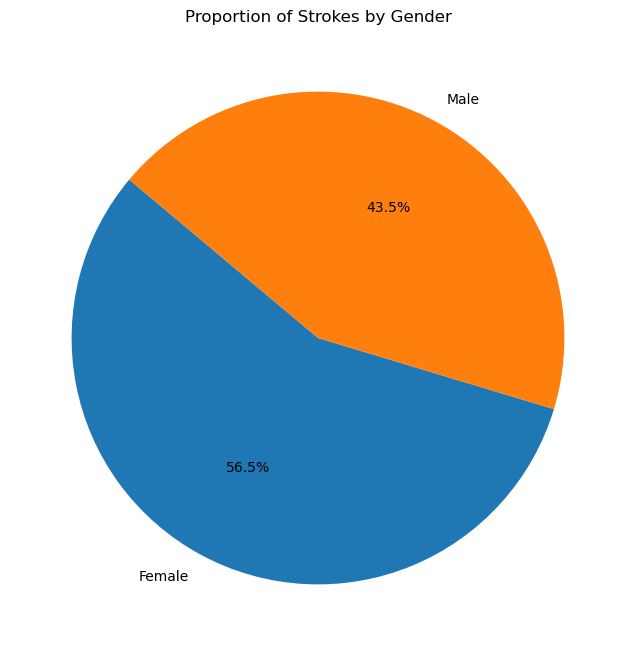

'stroke_gender.png'

In [13]:
gender = Stroke_factors.groupby(Stroke_factors['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels': gender.index,'values': gender.values})

plt.figure(figsize=(8,8))  
plt.pie(data_gender['values'], labels=data_gender['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Gender')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'Stroke_Gender.png'))
plt.show()
  
# List of saved files to confirm
saved_files = f'stroke_gender.png'
saved_files

In [14]:
Stroke_factors.groupby(['gender','stroke'])['stroke'].count()
# 0 is female and 1 is male 

#The second series of 0 and 1 means if they had a strokeor not 
# 0 for no stroke and 1 for had a stroke 

gender  stroke
Female  0         2767
        1          140
Male    0         1966
        1          108
Name: stroke, dtype: int64

#### The Distrubtion of Strokes Patients by Male or Female 

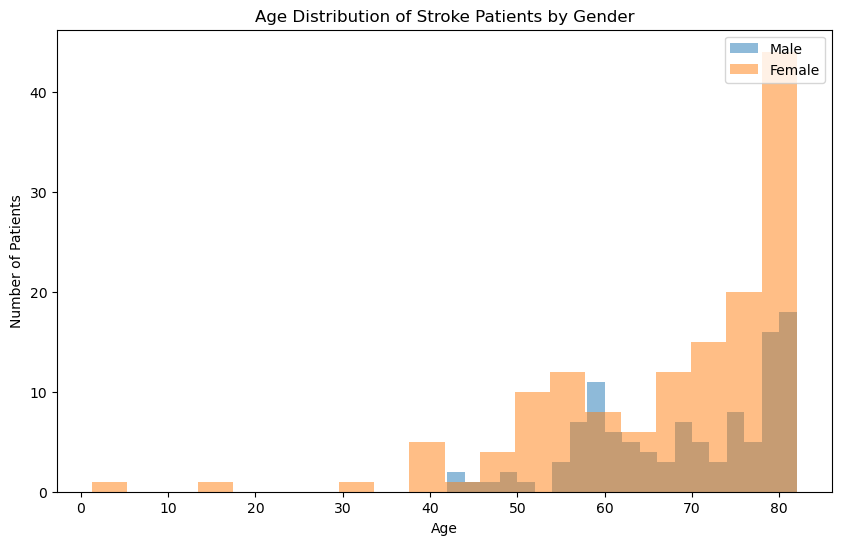

In [15]:
stroke = Stroke_factors.loc[Stroke_factors['stroke']== 1].reset_index()
stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"] 

# Prepare the data, excluding NaN values
male_ages = stroke['male_age'].dropna()
female_ages = stroke['female_age'].dropna()

# Plotting
plt.figure(figsize=(10,6))
plt.hist(male_ages, alpha=0.5, label='Male', bins=20)
plt.hist(female_ages, alpha=0.5, label='Female', bins=20)

plt.title('Age Distribution of Stroke Patients by Gender')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(loc='upper right')
plt.show()

#### The percentage of the proportion of people who had a stroke amoung Smokers

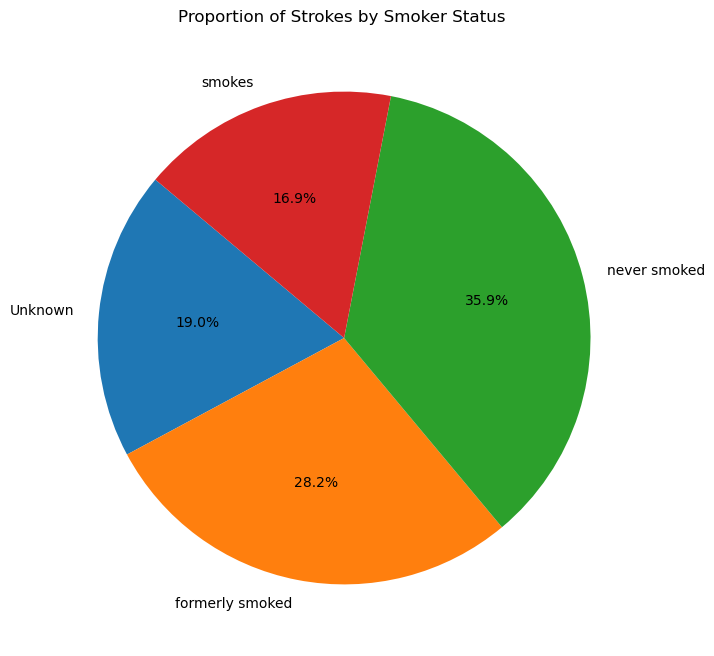

'stroke_smoker.png'

In [16]:
smoker = Stroke_factors.groupby(Stroke_factors['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels' : smoker.index, "values" : smoker.values})
plt.figure(figsize=(8,8)) 
plt.pie(data_smoke['values'], labels=data_smoke['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Smoker Status ')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'Stroke_smoker.png'))
plt.show()

# List of saved files to confirm
saved_files = f'stroke_smoker.png'
saved_files

#### The percentage of the proportion of people who had a stroke amoung Work Type

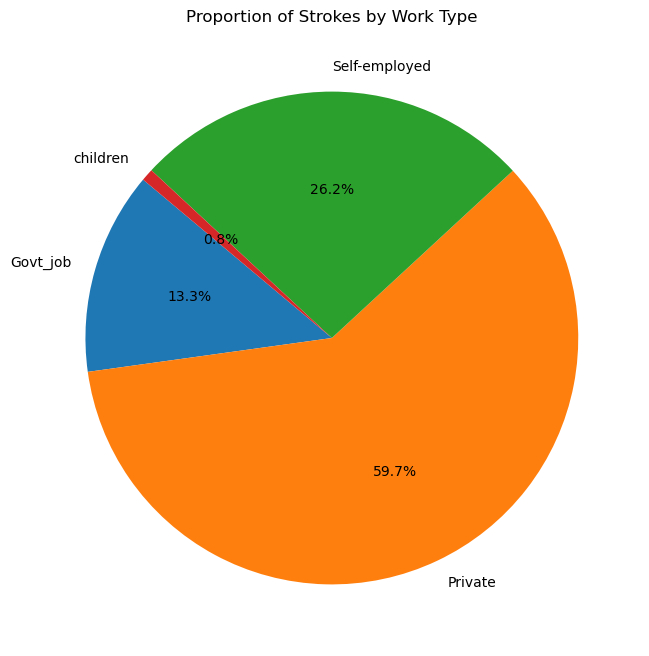

'stroke_work.png'

In [17]:
work_type = Stroke_factors.groupby(Stroke_factors['work_type'])['stroke'].sum()
data_work = pd.DataFrame({'labels' : work_type.index, "values" : work_type.values})
plt.figure(figsize=(8,8)) 
plt.pie(data_work['values'], labels=data_work['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Work Type')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'Stroke_work.png'))
plt.show() 
    
# List of saved files to confirm
saved_files = f'stroke_work.png'
saved_files

#### The percentage of the proportion of people who had a stroke amoung Married people 

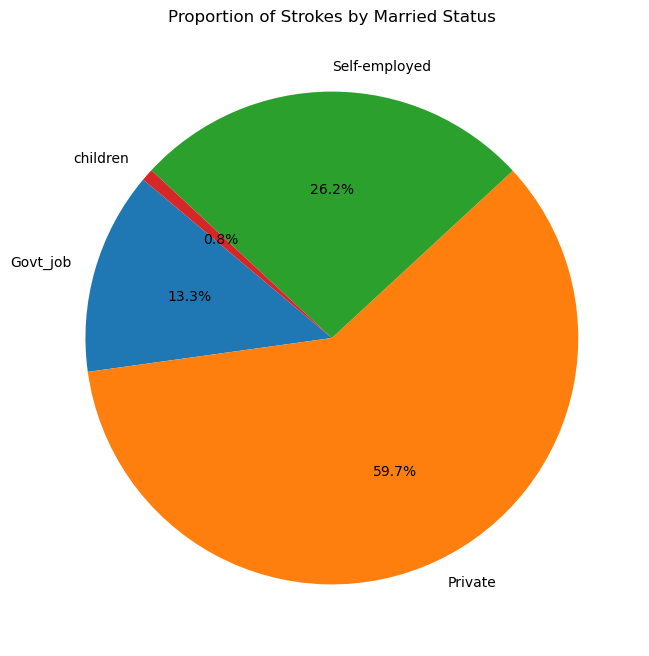

'stroke_marry.png'

In [18]:
Married = Stroke_factors.groupby(Stroke_factors['ever_married'])['stroke'].sum()
data_married = pd.DataFrame({'labels' : Married.index, "values" : Married.values})
plt.figure(figsize=(8,8)) 
plt.pie(data_work['values'], labels=data_work['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Married Status')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' Stroke_marry.png'))
plt.show()

   
# List of saved files to confirm
saved_files = f'stroke_marry.png'
saved_files

#### The percentage of the proportion of people who had a stroke amoung people with Heart disease 

'stroke_heartd.png'

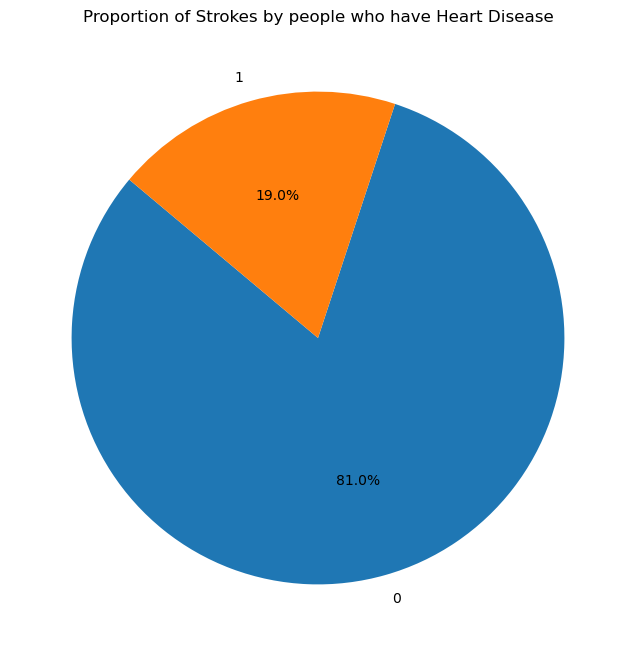

In [19]:
heart = Stroke_factors.groupby(Stroke_factors['heart_disease'])['stroke'].sum()
data_heart = pd.DataFrame({'labels': heart.index, 'values': heart.values})

plt.figure(figsize=(8,8)) 
plt.pie(data_heart['values'], labels=data_heart['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by people who have Heart Disease')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' Stroke_heartd.png'))

# List of saved files to confirm
saved_files = f'stroke_heartd.png'
saved_files

In [20]:
Stroke_factors.groupby(['heart_disease','stroke'])['stroke'].count()
# 0 no heart disease  and 1 has heart disease

#The second series of 0 and 1 means if they had a stroke or not 
# 0 for no stroke and 1 for had a stroke

heart_disease  stroke
0              0         4505
               1          201
1              0          228
               1           47
Name: stroke, dtype: int64

#### The percentage of the proportion of people who had a stroke amoung those who have hypertension 

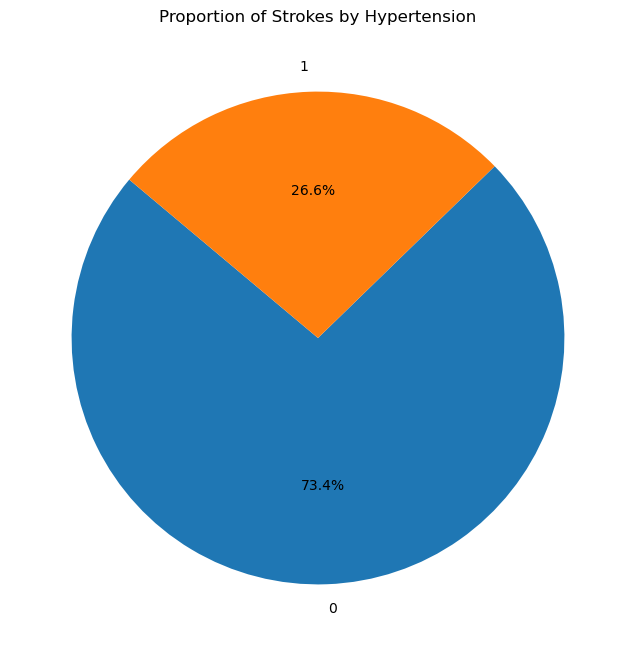

'stroke_hypertension.png'

In [21]:
hypertension = Stroke_factors.groupby(Stroke_factors['hypertension'])['stroke'].sum()
data_hypertension = pd.DataFrame({'labels': hypertension.index, 'values': hypertension.values})

plt.figure(figsize=(8,8)) 
plt.pie(data_hypertension['values'], labels=data_hypertension['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Hypertension')

# Save plot with name based on column name for PowerBi 
plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' Stroke_hypertension.png'))
plt.show()

    
# List of saved files to confirm
saved_files = f'stroke_hypertension.png'
saved_files

In [22]:
Stroke_factors.groupby(['hypertension','stroke'])['stroke'].count()
# 0 no hypertension and 1 has hypertension

#The second series of 0 and 1 means if they had a stroke or not 
# 0 for no stroke and 1 for had a stroke

hypertension  stroke
0             0         4320
              1          182
1             0          413
              1           66
Name: stroke, dtype: int64

### Visually show the Age, average glucose level and bmi of the participants in the dataset 1 

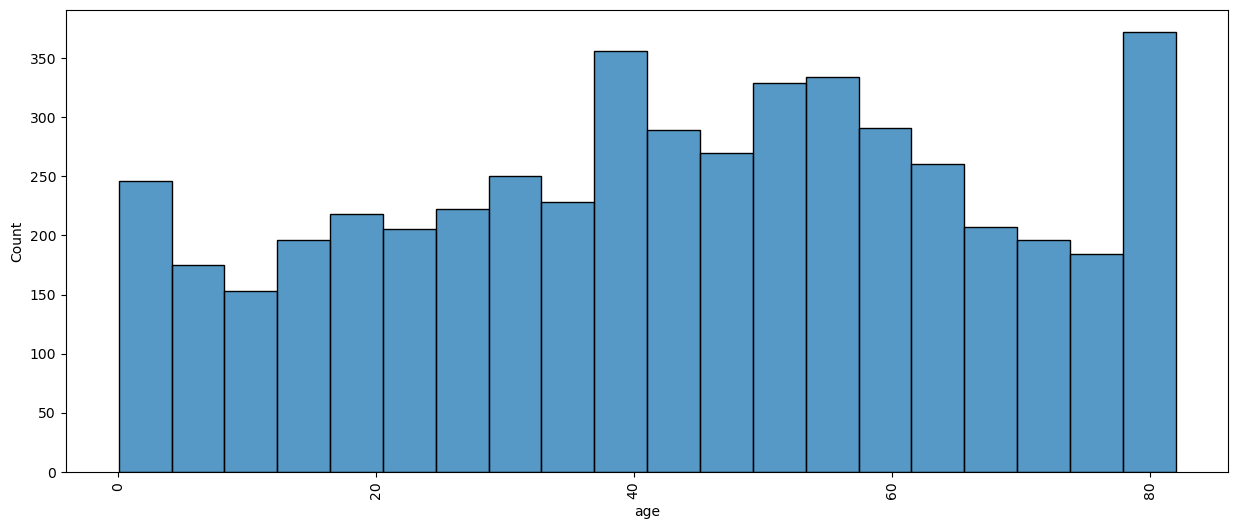

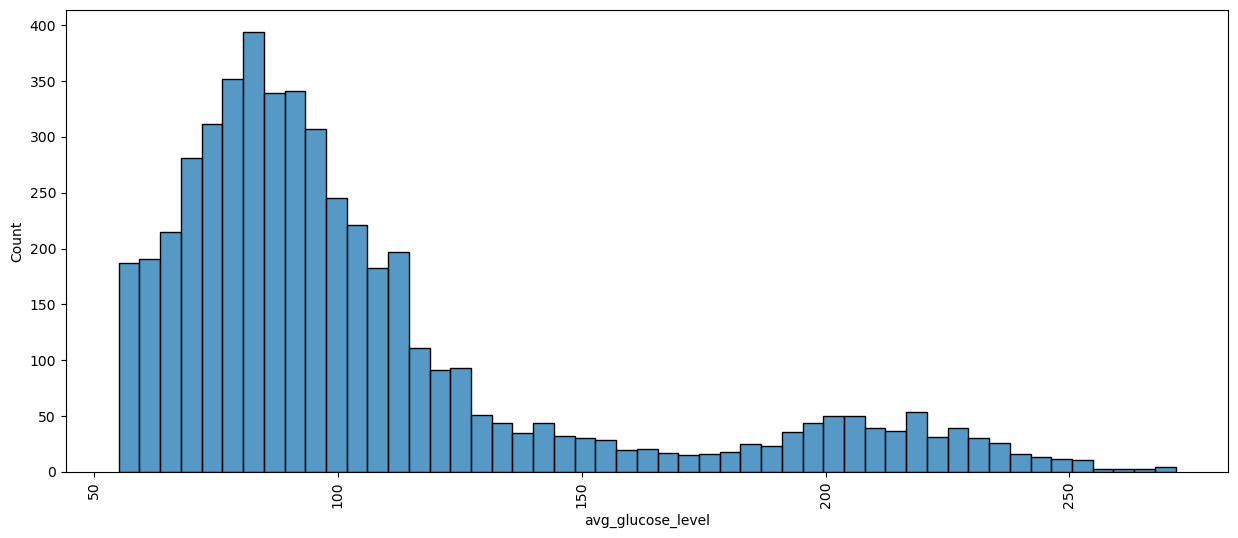

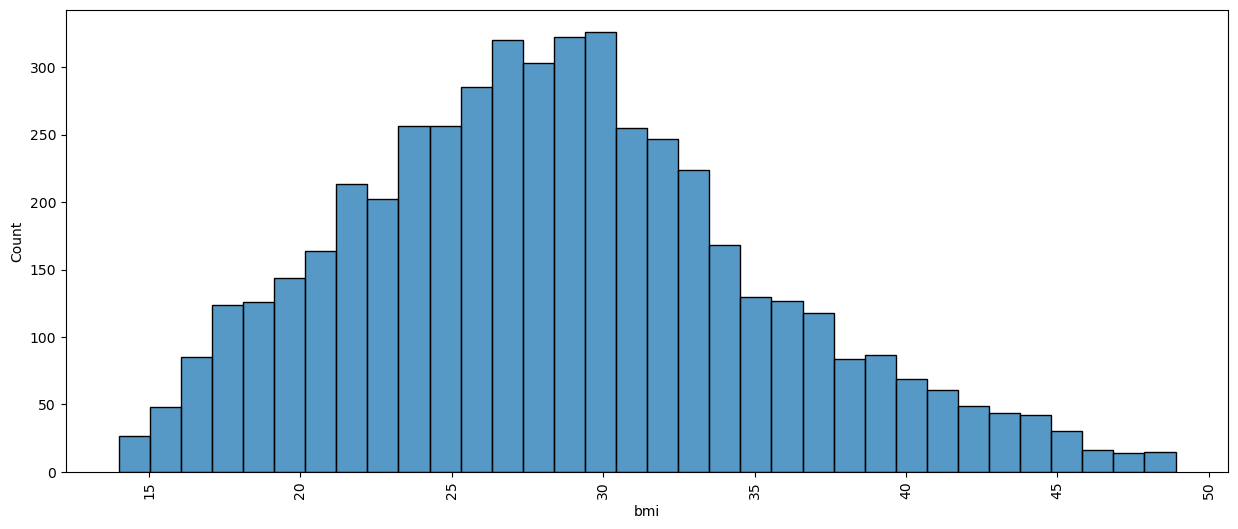

['age_other_factors.png',
 'avg_glucose_level_other_factors.png',
 'bmi_other_factors.png']

In [23]:
# Creating a histogram 
Other_factors = Stroke_factors[['age', 'avg_glucose_level', 'bmi']]

for i in Other_factors.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(Other_factors[i])
    plt.xticks(rotation = 90)
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'{i}_other_factors.png'))
    plt.show()
    

# List of saved files to confirm
saved_files = [f'{column}_other_factors.png' for column in Other_factors]
saved_files

#### The percentage of the proportion of people who had a stroke amoung Age

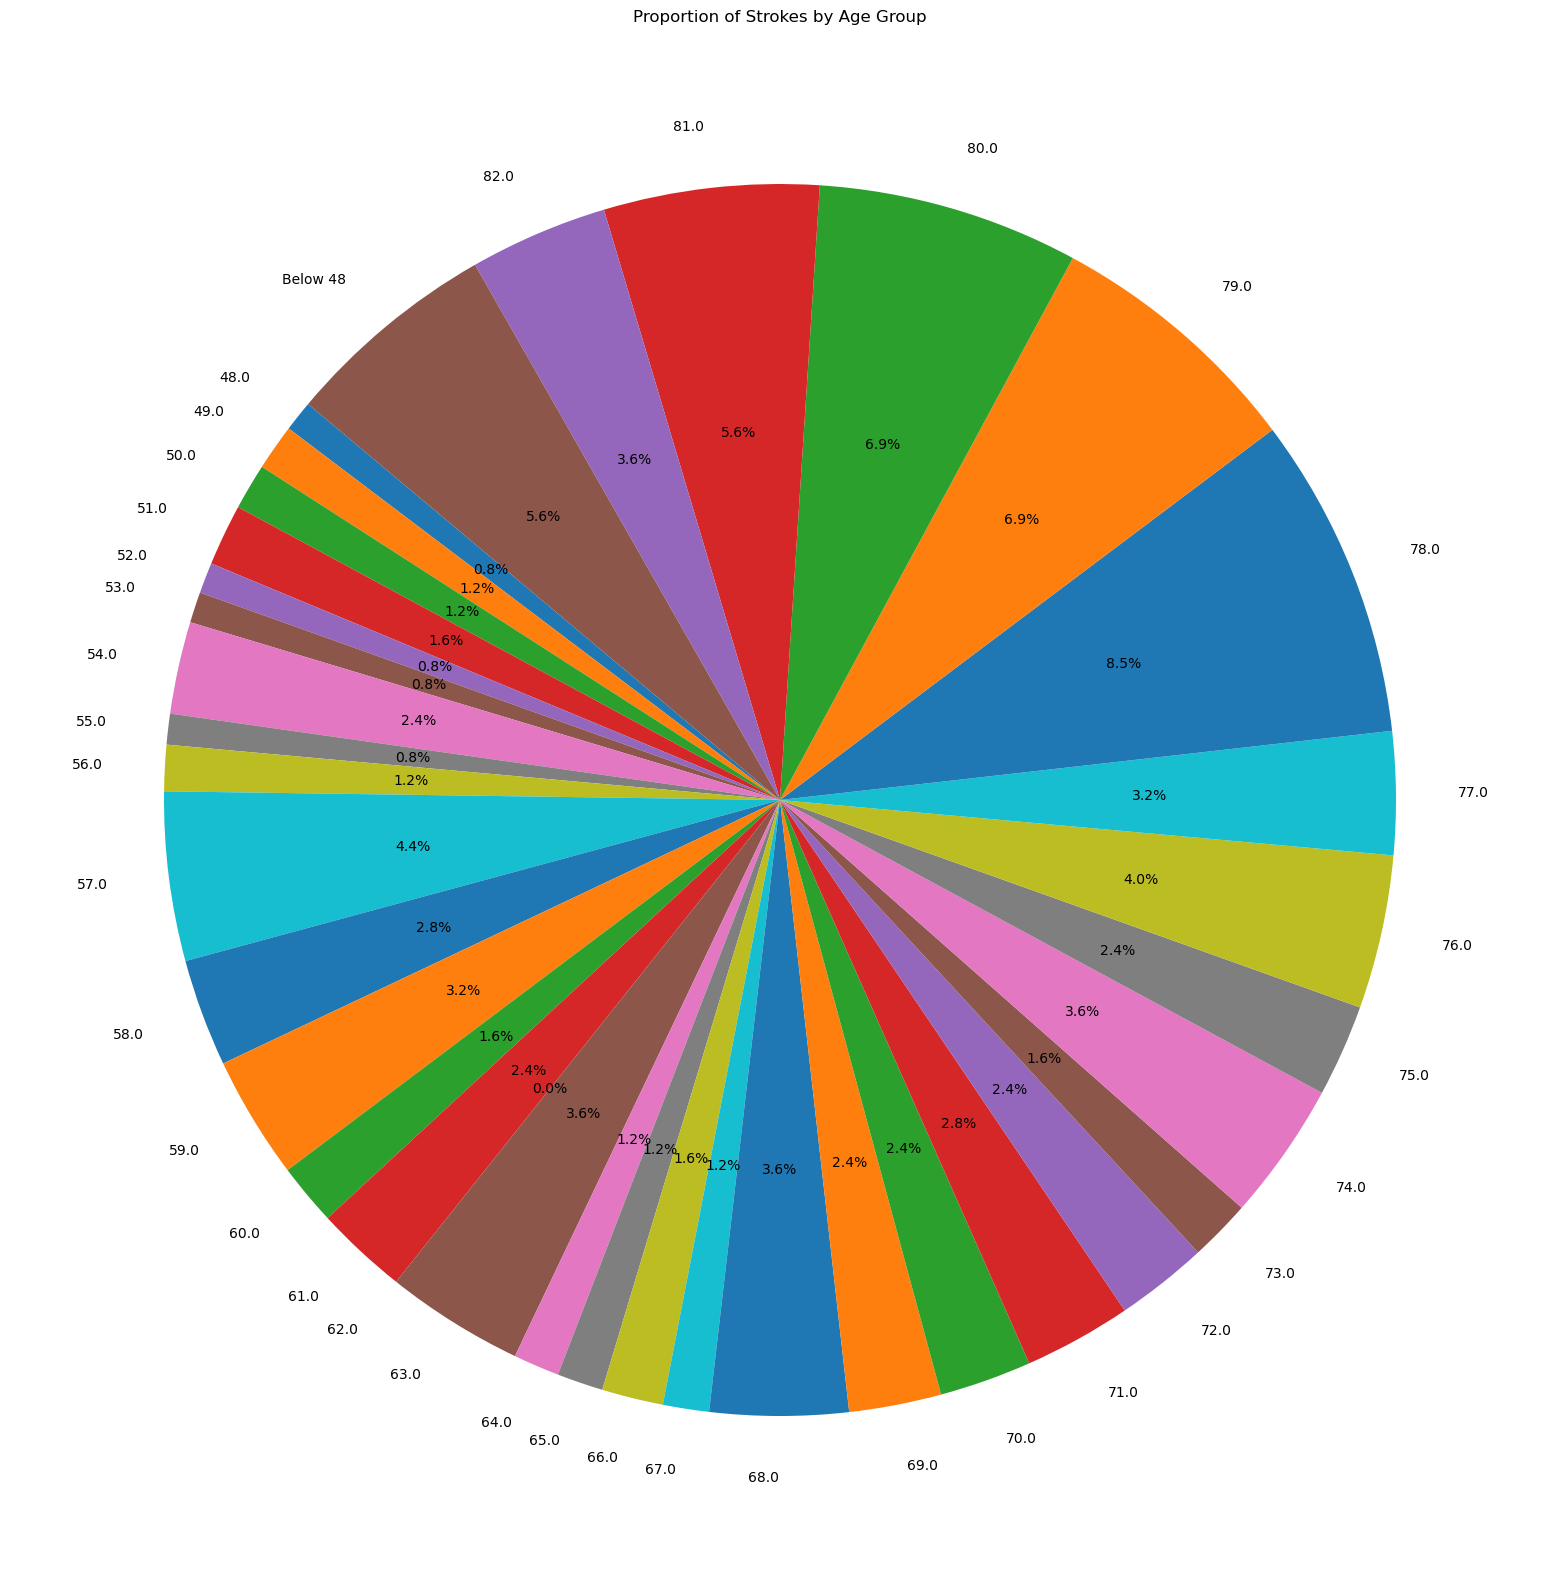

In [24]:
# Create a copy to avoid modifying the original DataFrame
df_copy = Stroke_factors.copy()

# Modify 'age' in the copy for grouping
df_copy['age_group'] = df_copy['age'].apply(lambda x: 'Below 48' if x < 48 else str(x))

# Group by the new 'age_group' and sum 'stroke' counts
age_modified_summary = df_copy.groupby('age_group')['stroke'].sum().reset_index()

# Ensure 'Below 48' is correctly aggregated
if 'Below 48' in age_modified_summary['age_group']:
    below_48_sum = age_modified_summary[age_modified_summary['age_group'] == 'Below 48']['stroke'].sum()
    age_modified_summary = age_modified_summary[age_modified_summary['age_group'] != 'Below 48']
    age_modified_summary = age_modified_summary.append({'age_group': 'Below 48', 'stroke': below_48_sum}, ignore_index=True)

# Sorting
age_modified_summary = age_modified_summary.sort_values(by='age_group')

# Plotting
plt.figure(figsize=(20, 20))  
plt.pie(age_modified_summary['stroke'], labels=age_modified_summary['age_group'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Age Group')
plt.show()

#### The percentage of the proportion of people who had a stroke amoung average Glucose levels 

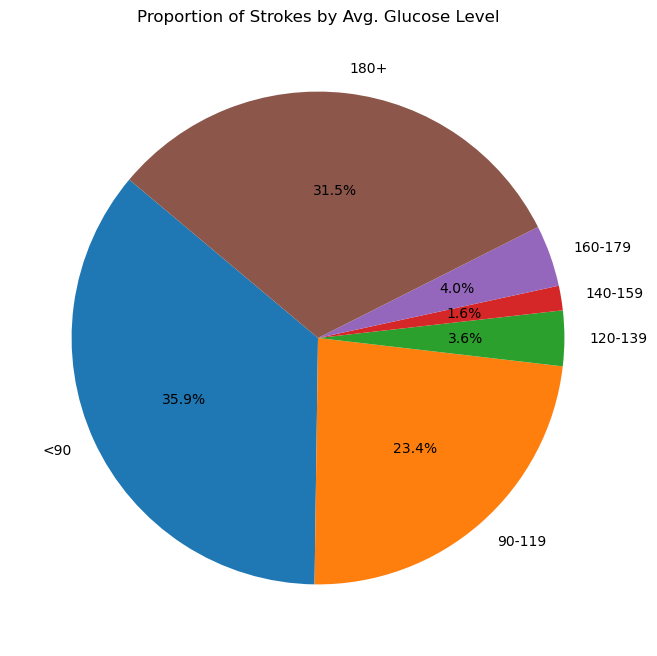

In [25]:
# Make a copy of the original DataFrame to preserve its data
stroke_factors_copy = Stroke_factors.copy()

# Define glucose level ranges
glucose_bins = [0, 90, 120, 140, 160, 180, np.inf]
glucose_labels = ['<90', '90-119', '120-139', '140-159', '160-179', '180+']

# Group 'avg_glucose_level' into ranges in the copy
stroke_factors_copy['glucose_range'] = pd.cut(stroke_factors_copy['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

# Group by the new 'glucose_range' and sum 'stroke' counts
glucose_grouped = stroke_factors_copy.groupby('glucose_range')['stroke'].sum()
data_glucose = pd.DataFrame({'labels': glucose_grouped.index, 'values': glucose_grouped.values})

# Plotting the pie chart for strokes by glucose level ranges
plt.figure(figsize=(8, 8))  # Adjust figure size for clarity
plt.pie(data_glucose['values'], labels=data_glucose['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by Avg. Glucose Level')
plt.show()

#### The percentage of the proportion of people who had a stroke amoung Bmi 

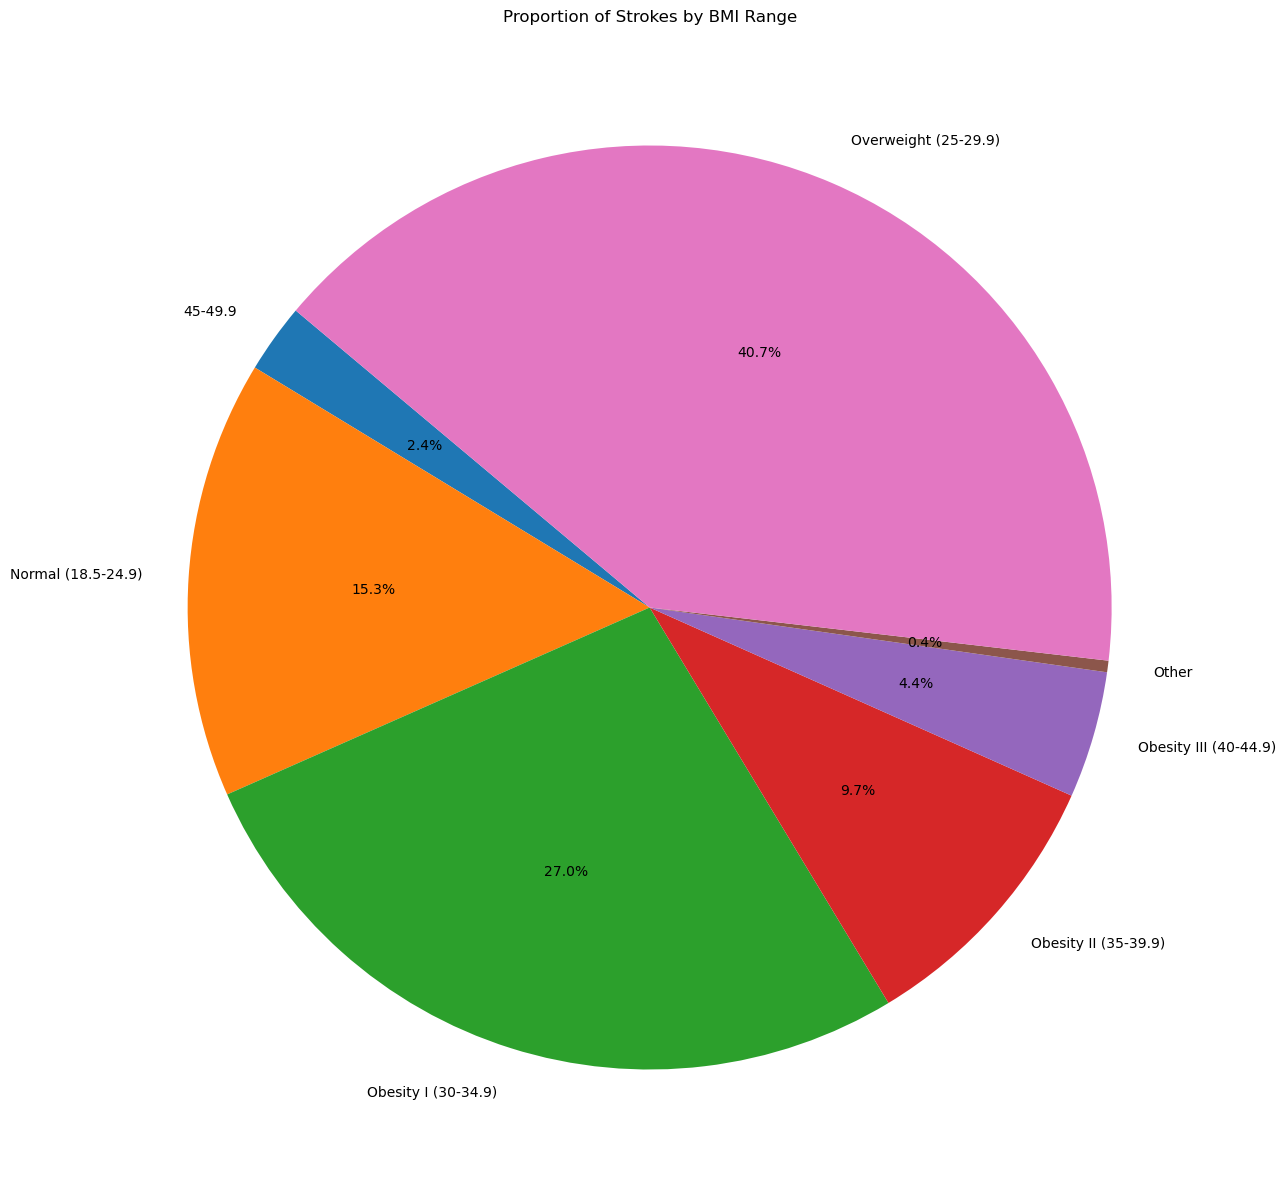

In [26]:
# Make a copy of the original DataFrame to preserve its data
stroke_factors_copy = Stroke_factors.copy()

# Define BMI ranges
bmi_bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 55, 60, np.inf]
bmi_labels = [
    'Underweight (<18.5)',
    'Normal (18.5-24.9)',
    'Overweight (25-29.9)',
    'Obesity I (30-34.9)',
    'Obesity II (35-39.9)',
    'Obesity III (40-44.9)',
    '45-49.9',
    '50-54.9',
    '55-59.9',
    '60+'
]

# Group 'bmi' into ranges in the copy
stroke_factors_copy['bmi_range'] = pd.cut(stroke_factors_copy['bmi'], bins=bmi_bins, labels=bmi_labels)

# Group by the new 'bmi_range' and sum 'stroke' counts
bmi_grouped = stroke_factors_copy.groupby('bmi_range')['stroke'].sum()
data_bmi = pd.DataFrame({'labels': bmi_grouped.index, 'values': bmi_grouped.values})

# Calculate the percentage of total for each category in the copy
total_values = data_bmi['values'].sum()
data_bmi['percentage'] = (data_bmi['values'] / total_values) * 100

# Label categories with less than 2% as 'Other'
data_bmi['new_labels'] = data_bmi.apply(lambda x: 'Other' if x['percentage'] < 2 else x['labels'], axis=1)

# Group by the new labels to combine the 'Other' values
grouped_data = data_bmi.groupby('new_labels')['values'].sum().reset_index()
grouped_data = grouped_data.rename(columns={'new_labels': 'labels'})

# Plotting the modified pie chart
plt.figure(figsize=(15, 15))
plt.pie(grouped_data['values'], labels=grouped_data['labels'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Strokes by BMI Range')
plt.show()

#### Update the data  for the Prediction Model in dataset 1: 

In [27]:
Stroke_factors['ever_married'] = [ 0 if i !='Yes' else 1 for i in Stroke_factors['ever_married'] ]
Stroke_factors['gender'] = [0 if i != 'Female' else 1 for i in Stroke_factors['gender']]
Stroke_factors=pd.get_dummies(Stroke_factors,columns=['work_type','Residence_type','smoking_status'])

# Convert all boolean columns to integers (1 for True, 0 for False)
for column in Stroke_factors.columns:
    if Stroke_factors[column].dtype == 'bool':
        Stroke_factors[column] = Stroke_factors[column].astype(int)

Stroke_factors.head()

# save to folder for PowerBi
Stroke_factors.head().to_csv("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI/Stroke_factors_head.csv", index=False)

### Spliting the dataset using train test split

In [28]:
X = Stroke_factors.drop(['stroke'], axis = 1)
y = Stroke_factors['stroke']

In [29]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.25,random_state=3)

In [30]:
print("X Shape: ", X.shape)
print("y Shape", y.shape)

X Shape:  (4981, 17)
y Shape (4981,)


## 1.5 Predictions Models 

## Building the models: 

#### Logistic Regression: 

In [33]:
log_reg=LogisticRegression(random_state=3)
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

Using a confusion matrix for the display of the Logistic Regression: 

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1187    0]
 [  59    0]]


In [35]:
print("Training set accuracy score:", log_reg.score(X_train, y_train))
print("Test-set accuracy score:", log_reg.score(X_test, y_test))

Training set accuracy score: 0.9493975903614458
Test-set accuracy score: 0.9526484751203852


In [36]:
acc_log_clf = metrics.accuracy_score(y_test,y_pred)
print("accuracy score:", acc_log_clf)


accuracy score: 0.9526484751203852


#### Decision Tree model 

In [37]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,y_train)
y_pred=dec_clf.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1180    7]
 [  59    0]]


In [39]:
print("Training set accuracy score:", dec_clf.score(X_train, y_train))
print("Test-set accuracy score:", dec_clf.score(X_test, y_test))

Training set accuracy score: 0.952342704149933
Test-set accuracy score: 0.9470304975922953


In [40]:
acc_dec_clf = metrics.accuracy_score(y_test,y_pred)
print("accuracy score:", acc_dec_clf)

accuracy score: 0.9470304975922953


#### K_Nearest Neighbours model

In [41]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

In [42]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[1177   10]
 [  58    1]]


In [43]:
training_accuracy_knn = knn_clf.score(X_train, y_train)
print("Training set accuracy score:", training_accuracy_knn)
test_accuracy_knn = knn_clf.score(X_test, y_test)
print("Test-set accuracy score:", test_accuracy_knn)

Training set accuracy score: 0.9499330655957162
Test-set accuracy score: 0.9454253611556982


In [44]:
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy score:", acc_knn)

Accuracy score: 0.9454253611556982


#### Random Forest Classifier 

In [45]:
rand_clf=RandomForestClassifier(n_estimators=20,criterion="entropy")
rand_clf.fit(X_train,y_train)
y_pred=rand_clf.predict(X_test)

In [46]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1181,    6],
       [  59,    0]], dtype=int64)

In [47]:
print("Training set accuracy score:", rand_clf.score(X_train, y_train))
print("Test-set accuracy score:", rand_clf.score(X_test, y_test))

Training set accuracy score: 0.9965194109772423
Test-set accuracy score: 0.9478330658105939


In [48]:
acc_rand_clf = metrics.accuracy_score(y_test,y_pred)
print("accuracy score:", acc_rand_clf)

accuracy score: 0.9478330658105939


## 1.6 Visualization of the Prediction Models 

Logistic Regression Heatmap 

Score :  0.9526484751203852


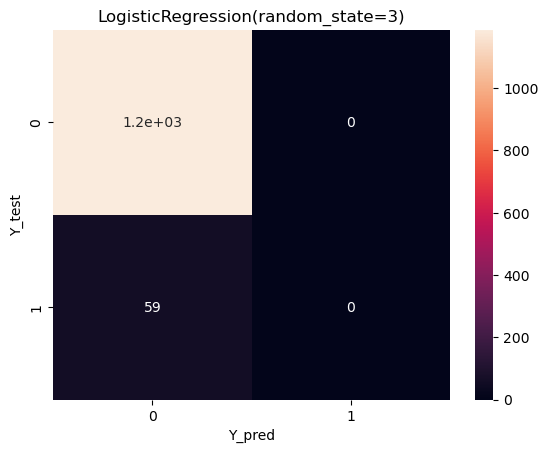

'log_reg.png'

In [61]:
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'log_reg.png'))
    plt.show()
    

saved_files = f'log_reg.png'
saved_files  


Decision Tree Heatmap 

Score :  0.9470304975922953


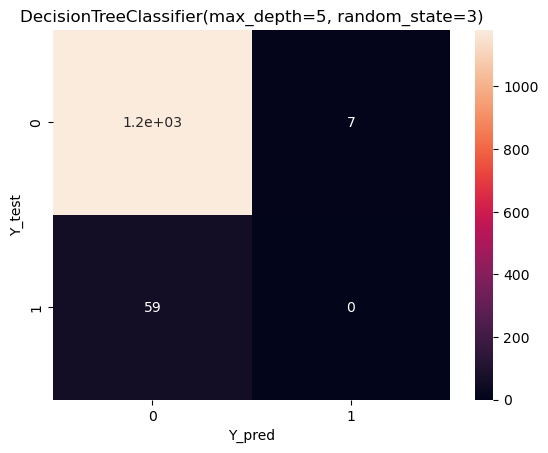

'Decision_tree.png'

In [62]:
pred_list = [dec_clf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' Decision_tree.png'))
    plt.show()
    

saved_files = f'Decision_tree.png'
saved_files

K-Nearest Neighbor Heatmap 

Score :  0.9454253611556982


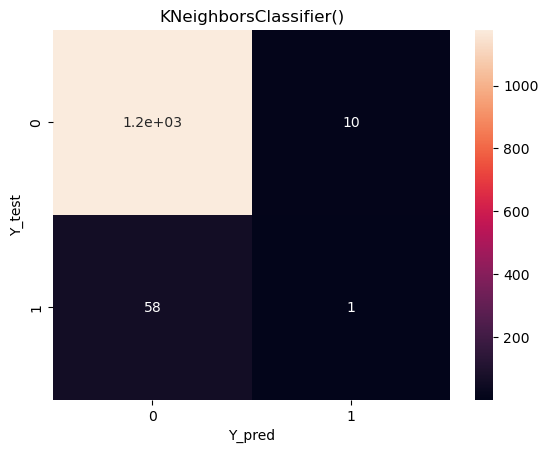

'KNN.png'

In [63]:
pred_list = [knn_clf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f' KNN.png'))
    plt.show()
    

saved_files = f'KNN.png'
saved_files

Random Forest Classifier 

Score :  0.9478330658105939


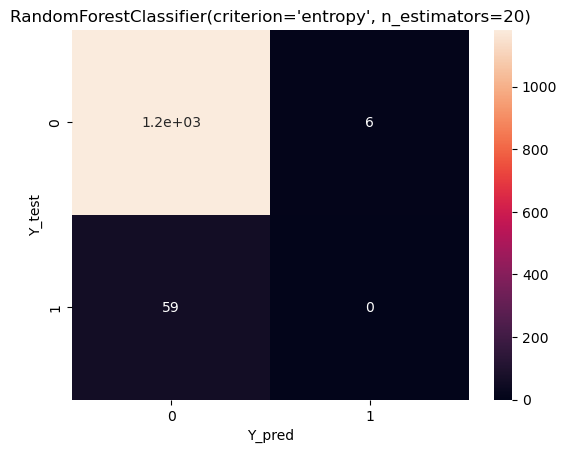

'Rand_forest.png'

In [64]:
pred_list = [rand_clf]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    
    # Save plot with name based on column name for PowerBi 
    plt.savefig(os.path.join("C:/Users/lawre/Machine Learning/Term Project/PhotosPowerBI",f'Rand_frest.png'))
    plt.show()
    

saved_files = f'Rand_forest.png'
saved_files


## References:  

### From Kaggle: 

#### 1. Brain Stroke Dataset Classification Prediction - jillanisofttech

URL: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset?resource=download